# Hate speech

Hate sonar!!!!!
readability test (additional features)


In this file, we aim to analyze and identify hate speech in the tweets of politicians. 
To accomplish this, we utilized Detoxify, a powerful tool that has demonstrated excellent performance in various competitions. 
Souce: https://github.com/unitaryai/detoxify

## 1. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from detoxify import Detoxify
from wordcloud import WordCloud

## 2. Reading data

In [2]:
df = pd.read_parquet('cleaned_data/df_combined.parquet')

In [3]:
df.head()

,in_reply_to_user_id,reply_settings,author_id,context_annotations,id,text,edit_controls,referenced_tweets,created_at,edit_history_tweet_ids,...,links,hashtags,retweet_count,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,name
0,375146901.0,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846277256509116672,"@donaldtusk Niezrealizowanie większości ze ""10...",{'editable_until': '2024-10-15 20:49:34+00:00'...,"[{'id': '1846091776269963695', 'type': 'replie...",2024-10-15 19:49:34+00:00,[1846277256509116623],...,[],[],3,1,33,0,1555,"Failure to implement most of the ""100 specifi...","Failure to implement most of the ""100 specifi...",Bartłomiej Pejo
1,NaN,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846222583898784000,Rok po wyborach trzeba powiedzieć jedno - nie ...,{'editable_until': '2024-10-15 17:12:19+00:00'...,None,2024-10-15 16:12:19+00:00,[1846222583898784025],...,[https://t.co/4Jh5Ni6sgr],[],9,2,72,0,3031,"A year after the elections, one thing must be ...","A year after the elections, one thing must be ...",Bartłomiej Pejo
2,NaN,everyone,1.182212e+09,None,1846161400328028160,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",{'editable_until': '2024-10-15 13:09:12+00:00'...,None,2024-10-15 12:09:12+00:00,[1846161400328028272],...,"[https://t.co/zFk5QLd1em, https://t.co/bRV4y07...",[],4,3,33,2,8636,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,Bartłomiej Pejo
3,NaN,everyone,1.182212e+09,None,1846091824101769472,Mija rok od wyborów parlamentarnych. W kampani...,{'editable_until': '2024-10-15 08:32:44+00:00'...,None,2024-10-15 07:32:44+00:00,[1846091824101769490],...,"[https://t.co/rtVu3Bh43G, https://t.co/8Q3LME6...",[],6,2,38,0,2441,A year has passed since the parliamentary elec...,A year has passed since the parliamentary elec...,Bartłomiej Pejo
4,NaN,everyone,1.182212e+09,None,1846075343188144128,#Idę11 🇵 🇱 https://t.co/KiCe5ATOpX,{'editable_until': '2024-10-15 07:27:14+00:00'...,None,2024-10-15 06:27:14+00:00,[1846075343188144153],...,[https://t.co/KiCe5ATOpX],[#Idę11],45,18,616,2,8634,#I'm going11 🇵 🇱,#I'm going11 🇵 🇱,Bartłomiej Pejo


In [4]:
df = df[['username','name','party','text_clean_en']].copy()

## 3. Finding the most toxic tweets

In [5]:
model = Detoxify('original', device='cuda')
detoxify_results = df['text_clean_en'].apply(lambda x: model.predict(x) if pd.notnull(x) else {})
detoxify_df = pd.json_normalize(detoxify_results)
df = pd.concat([df, detoxify_df], axis=1)
df.head()

C:\Users\CarpeDiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\CarpeDiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,username,name,party,text_clean_en,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,bartlomiejpejo,Bartłomiej Pejo,Konfederacja,"Failure to implement most of the ""100 specifi...",0.000774,0.000110,0.000167,0.000117,0.000190,0.000142
1,bartlomiejpejo,Bartłomiej Pejo,Konfederacja,"A year after the elections, one thing must be ...",0.000626,0.000121,0.000179,0.000124,0.000178,0.000143
2,bartlomiejpejo,Bartłomiej Pejo,Konfederacja,"❌ We are a year after the elections, and Pola...",0.010348,0.000122,0.000362,0.000217,0.000452,0.000452
3,bartlomiejpejo,Bartłomiej Pejo,Konfederacja,A year has passed since the parliamentary elec...,0.000686,0.000114,0.000171,0.000120,0.000173,0.000142
4,bartlomiejpejo,Bartłomiej Pejo,Konfederacja,#I'm going11 🇵 🇱,0.009303,0.000103,0.000544,0.000188,0.000363,0.000198


In [6]:
pd.set_option('display.max_colwidth', None)
df
categories = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']

for category in categories:
    print(f"Top 5 tweets for {category}:")
    top_tweets = df.nlargest(5, category)[['name', 'party', 'text_clean_en', category]]
    print(top_tweets.to_string(index=False)) 
    print("\n")

Top 5 tweets for toxicity:
              name        party                                                                                                                                                                                                               text_clean_en  toxicity
       Patryk Jaki          PIS                                                                                                So "fuck you..." and "fuck P..." can be said, but "pancake" and "king kong" cannot be said. \nWhat a bummer, this Hołownia.   0.997799
       Patryk Jaki          PIS                                                   The Germans finance festivals, because that's the kind of Poland they want 👇 Those who want a strong and independent Poland should go fuck themselves... and go away....   0.989568
 Izabela Leszczyna           PO                                                "Prevention, stupid!" one would like to say, because although its effects will be visible only in a few or a

## 4. Top 5 most toxic politicians

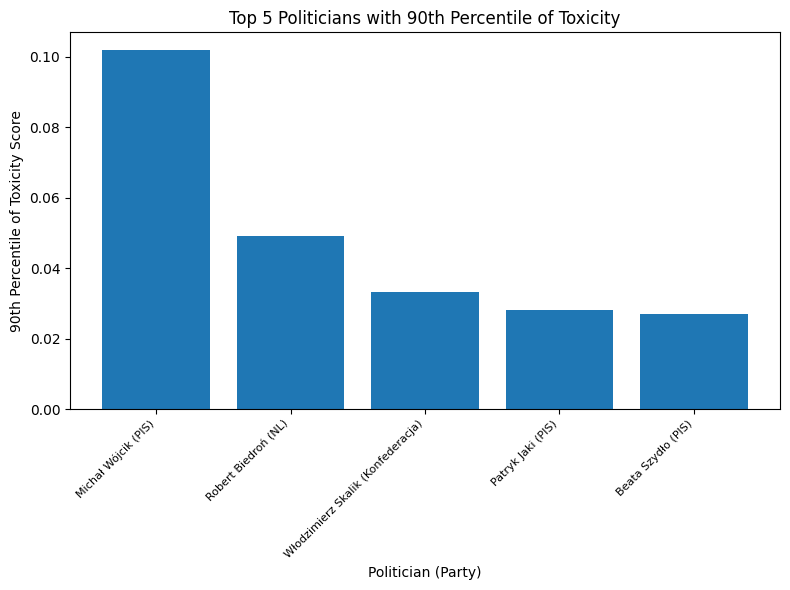

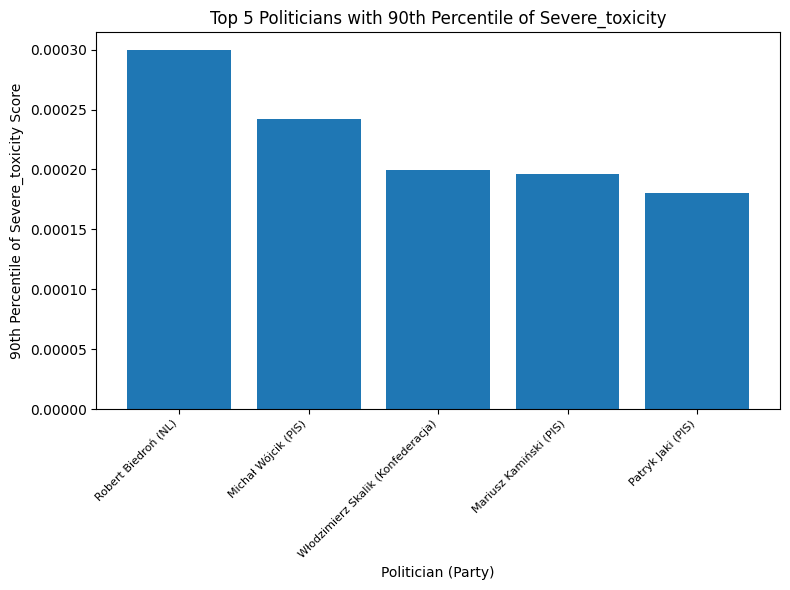

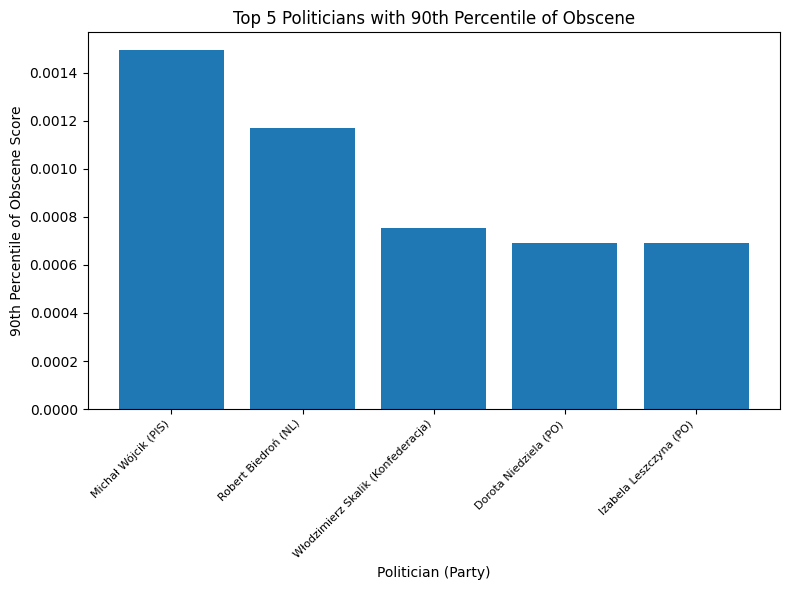

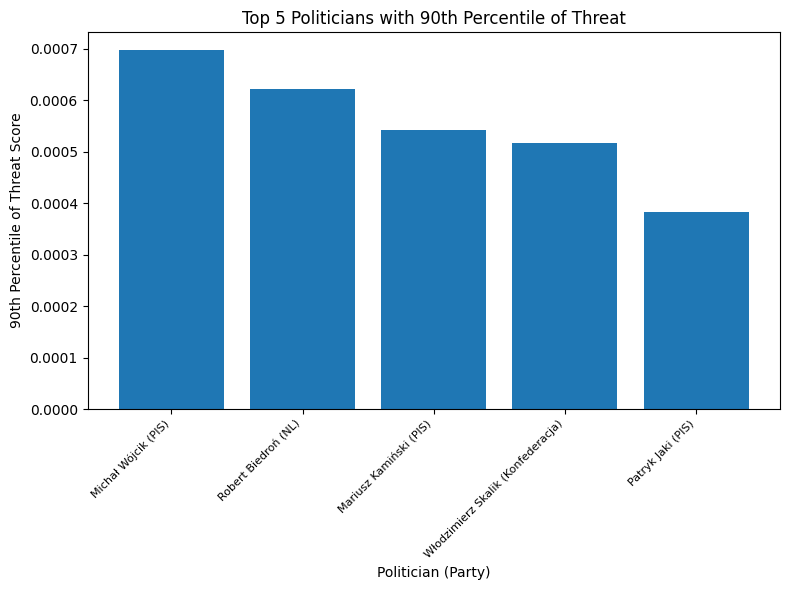

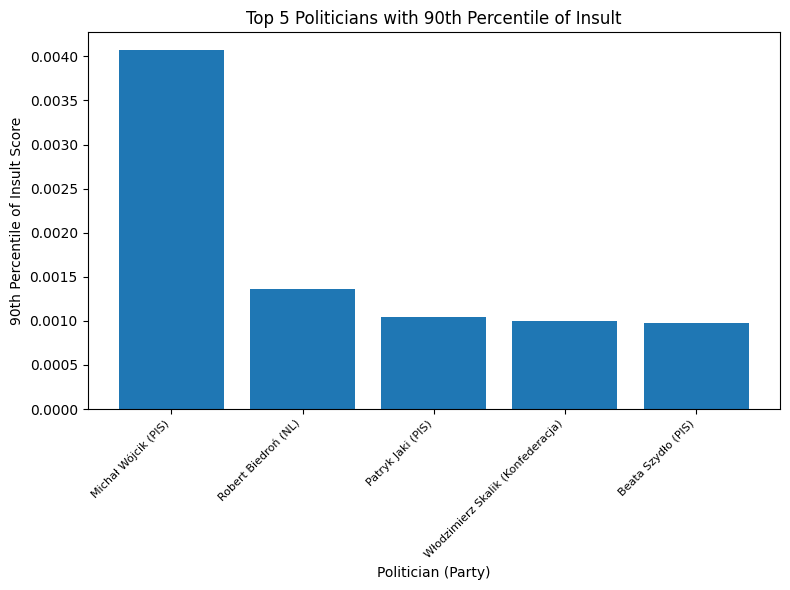

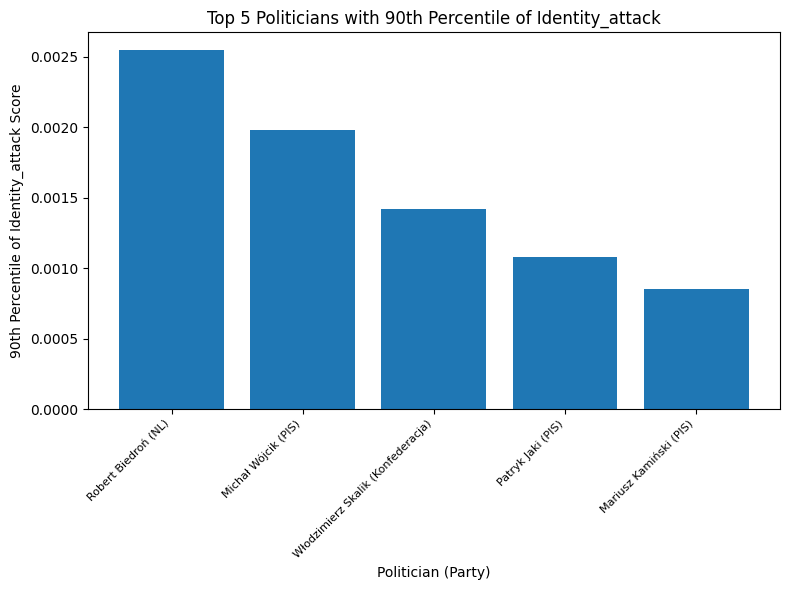

In [7]:
categories = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']

for category in categories:
    people_avg_score = df.groupby('name')[category].quantile(q=0.9).reset_index()
    
    top_5_people = people_avg_score.nlargest(5, category)

    top_5_people['name_with_party'] = top_5_people['name'].apply(
        lambda name: f"{name} ({df[df['name'] == name]['party'].iloc[0]})"
    )

    plt.figure(figsize=(8, 6))
    bars = plt.bar(top_5_people['name_with_party'], top_5_people[category])

    plt.xlabel('Politician (Party)', fontsize=10)
    plt.ylabel(f'90th Percentile of {category.capitalize()} Score', fontsize=10)
    plt.title(f'Top 5 Politicians with 90th Percentile of {category.capitalize()}', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=8)

    plt.tight_layout()
    plt.show()

We decided to analyze the 90th percentile instead of the mean of the statistics because this approach allows us to more easily identify individuals who are prone to writing toxic tweets. In some cases, the average can be biased, especially when someone posts a high volume of tweets. According to the model, the most toxic tweets are written by Michał Wójcik, who also appears in the top two positions across all other categories. The second most toxic individual is Robert Biedroń, who alternates between first and second place in each of the other categories.

## 5. Parties ranking

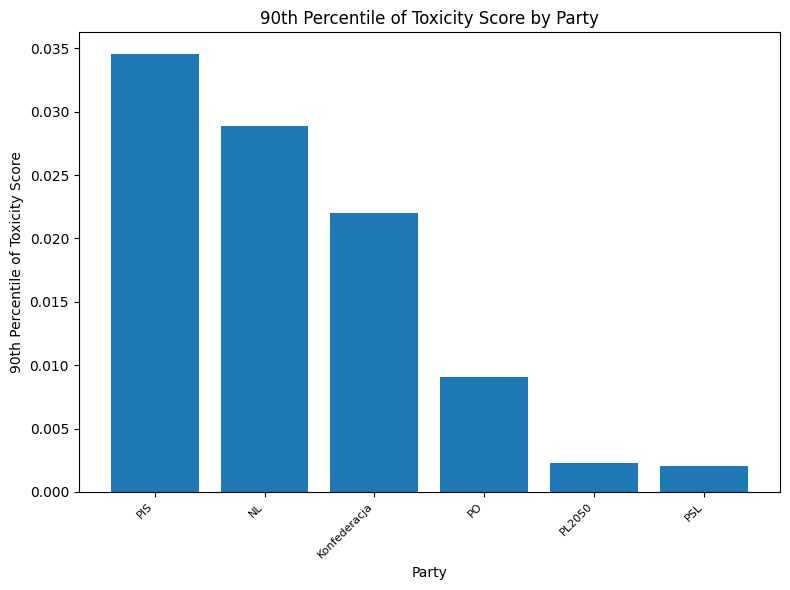

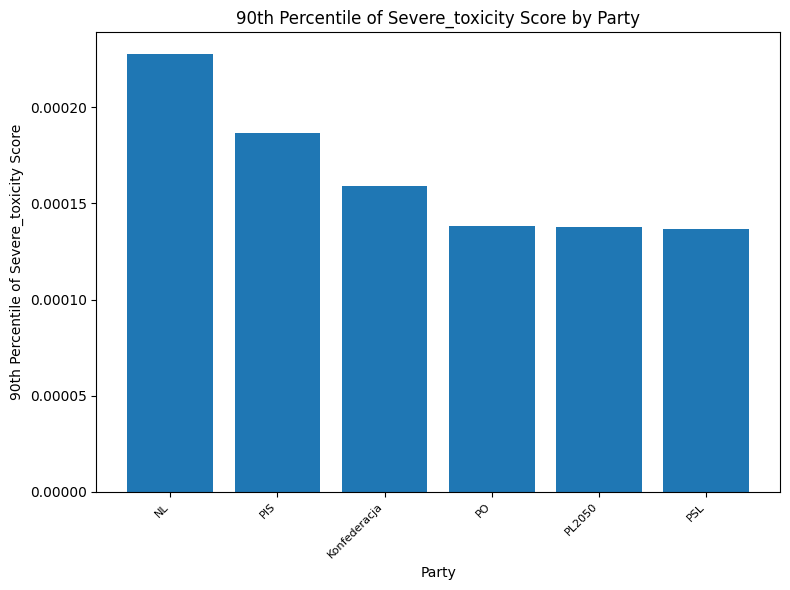

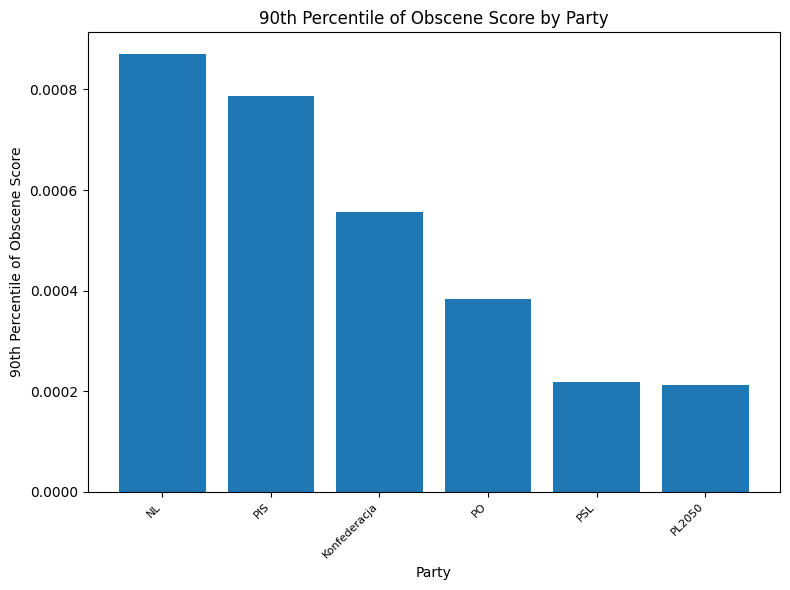

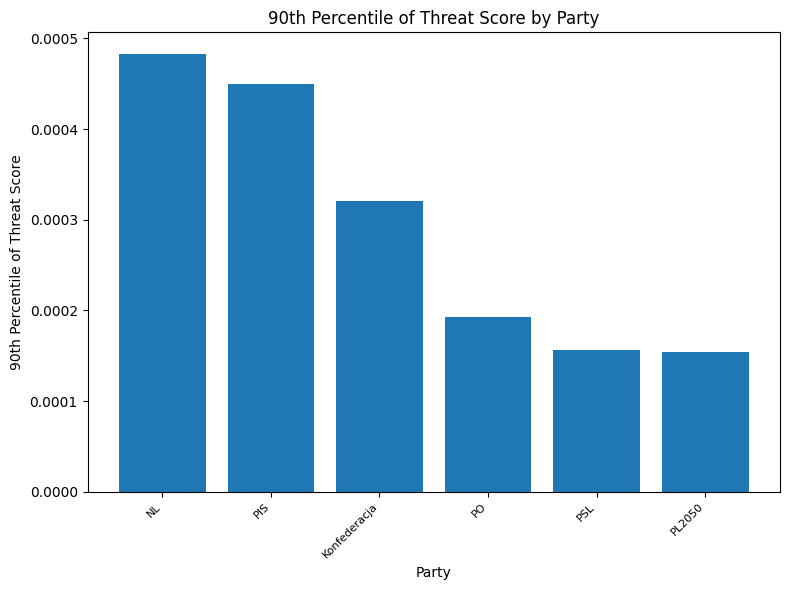

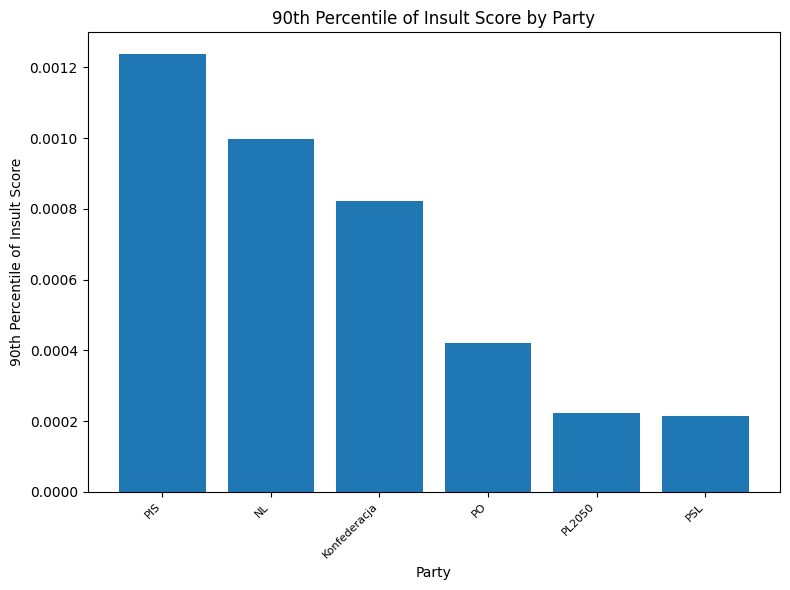

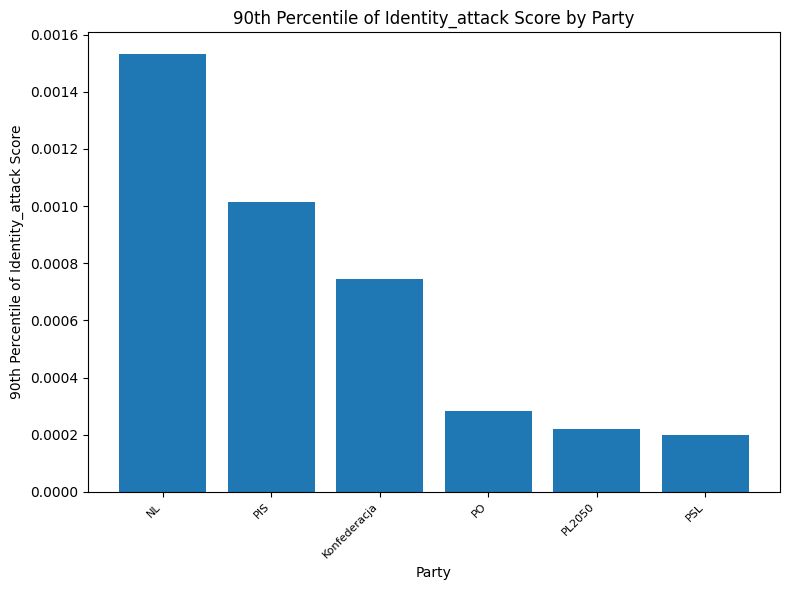

In [8]:
for category in categories:
    party_avg_score = df.groupby('party')[category].quantile(q=0.9).reset_index()
    party_avg_score = party_avg_score.sort_values(by=category, ascending=False)

    plt.figure(figsize=(8, 6))
    bars = plt.bar(party_avg_score['party'], party_avg_score[category])

    plt.xlabel('Party', fontsize=10)
    plt.ylabel(f'90th Percentile of {category.capitalize()} Score', fontsize=10)
    plt.title(f'90th Percentile of {category.capitalize()} Score by Party', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=8)

    plt.tight_layout()
    plt.show()


Based on the above graphs, we can identify two distinct groups of parties. The first group consists of PiS, Konfederacja, and NL, which are characterized by a high 90th percentile of toxicity in their tweets. The second group includes PO, PL2050, and PSL, which exhibit much lower toxicity scores. In the other categories, the situation remains consistent. Notably, for severe toxicity, there is not a significant gap between these groups, suggesting that severe toxicity may be less prevalent in the tweets of Polish politicians.

## 6. Wordcloud

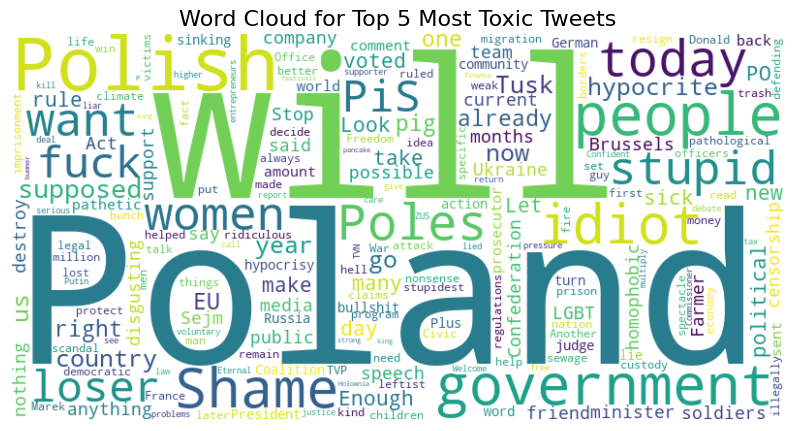

In [9]:
top_5_tweets = df.nlargest(100, 'toxicity')[['text_clean_en']]

text = ' '.join(top_5_tweets['text_clean_en'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title("Word Cloud for Top 5 Most Toxic Tweets", fontsize=16)
plt.show()


## 7. Conclusions

1. Models like Detoxify, which is based on BERT, enables to identify toxic tweets effectively.

2. According to the model, Michał Wójcik writes the most toxic tweets and consistently appears in the top two positions across all categories. Robert Biedroń is the second most toxic individual, alternating between first and second place in each category.

3. The parties PiS, Konfederacja, and NL exhibit a high 90th percentile of toxicity in their tweets, while PO, PL2050, and PSL show much lower toxicity scores.

4. For severe toxicity, there is not a significant gap between political parties, indicating that severe toxicity may be less prevalent in the tweets of Polish politicians.